## CAPSTONE PROJECT-1:- PRCP-1025-
### FlightPricePrediction

### PROJECT TEAM ID :- PTID-CDS-FEB-24-1799

#### Problem Statement-

 Flight fare is the fee paid by a passenger for air transport and is made up of the charge for a passenger to fly from an origin to destination and includes the conditions, rules and restrictions. Flight fares are typically made up of fare and rule components that define the flight fare product, services and price and includes origin/destination pair, fare class, one-way/round-trip indicator, fare amount, validity dates, mileage and other rules. Flight fares are hard to guess, they typically do not follow a pattern as the price varies today, tomorrow, day after tomorrow, next week and so on. Prediction of flight fare via machine learning is possible which will help the passengers book their intended flight on the required date and time.
 
### Attribute Information:

1- Airline: So this column will have all the types of airlines like Indigo, Jet Airways,Air India, and
many more.


2- Date_of_Journey: This column will let us know about the date on which the
passenger’s journey will start.

3- Source: This column holds the name of the place from where the passenger’s
journey will start.

4- Destination: This column holds the name of the place to where passengers
wanted to travel.

5- Route: Here we can know about what the route is through which passengers
          have opted to travel from his/her source to their destination.

6- Arrival_Time: Arrival time is when the passenger will reach his/her destination.

7- Duration: Duration is the whole period that a flight will take to complete its
journey from source to destination.

8- Total_Stops: This will let us know in how many places flights will stop there for
the flight in the whole journey.

9- Additional_Info: In this column, we will get information about food, kind of food,
and other amenities.

10- Price: Price of the flight for a complete journey including all the expenses before
onboarding.





### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
import calendar
import warnings
warnings.filterwarnings("ignore")
sns.set()

#### Functionalities of  libraries
1) Numpy - for statistical calculations.
2) Pandas - for dataset processing. 
3) Matplotlib and Seaborn - for data visualization. 
4) datetime and calendar - for handling date parameter. 
5) Warnings - to filter warning messages.

### Loading Data 

In [2]:
data=pd.read_csv('Flight_Fare.csv')

In [3]:
#data viewing
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


 * The dataset has 10683 rows.
 * There is 11 features in which "Price" is the dependent variable.

### Basic checks

In [4]:
#checking first 4 coloumns
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#checking last 4 coloums
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
#checking the number of rows and column
data.shape

(10683, 11)

* rows=10683
* columns=11

In [7]:
# checking all columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [8]:
# checking the data types of all the columns
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
#checking null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* There is null values in "Route" and "Total_stops"

## Exploratory data analysis

In [11]:
#general information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


* Minimum price is Rs.1759
* Maximum price is Rs.79512
 

In [13]:
#key description
data.describe(include=['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


* There is 12 unique Airline providers.
* The jet Airways data has 3849 rows.
* 44 unique Date_of_journey of which around 504 passengers flew on 18/05/2019. 
* unique departure cities of which Delhi has most number of data, around 4537 rows.
* unique destination cities of which Cochin has the most number of data, around 4537 rows.
* 127 unique routes(1 route has null data and is not considered here). Delhi to Cochin via Bombay(route DEL --> BOM --> COK) is the most frequently used, around 2376 times.
* 222 unique departure timings and 1343 arrival timings. 
* 368 unique durations of travel available of which the most frequent duration is 2h 50m 
* 4 unique total stops(1 total stop has null data and is not considered here). Around 5625 rows of direct flight data available.

In [14]:
#checking for duplicate values
data.duplicated().sum()

220

* There is 220 duplicate rows. 
* It will be removed in datapreprocessing step.

### Data visualization and Analysis.

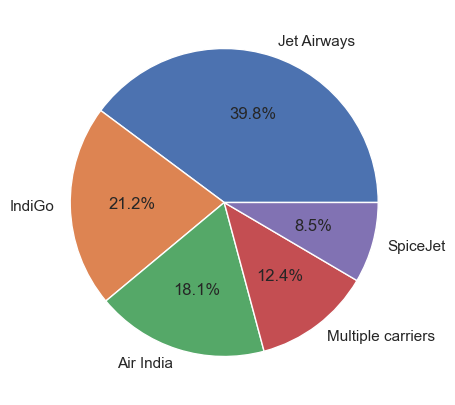

In [15]:
data_airline_group = data.groupby(data["Airline"]).count()
data_airline_group_sorted = data_airline_group.sort_values(by=["Source"], ascending=False)
data_airline_group_sorted

data_airline_label = []
for airline in data_airline_group_sorted.head(5).index:
    data_airline_label.append(airline)

plt.figure(figsize=(5,5))
plt.pie(data_airline_group_sorted["Source"].head(5), labels=data_airline_label, autopct="%.1f%%")
plt.show()



* Jet Airways is in the  top of the list with most number of flights operated.
* IndiGo, Air India, Multiple carriers(other airlines) and SpiceJet are in respective order.

## Univariate

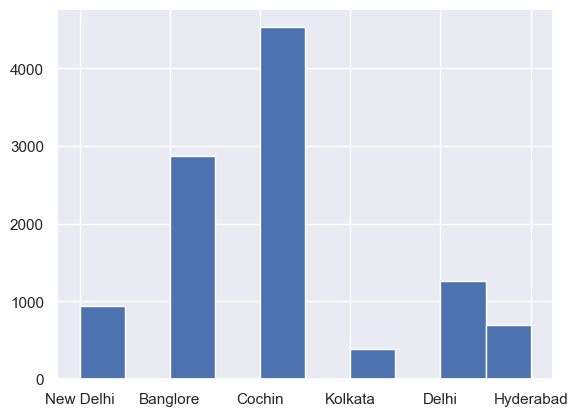

In [16]:
#top destinations
plt.hist(data["Destination"])
plt.show()

* The Large number of flights had their destination city as Cochin.
* Followed by Bangalore, Delhi, New Delhi, Hyderabad and Kolkata.

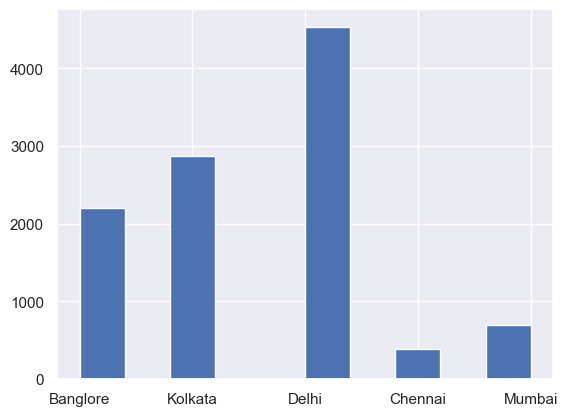

In [17]:
#top departure 
plt.hist(data["Source"])
plt.show()


* The large  number of flights were operated from Delhi.
* Followed by Kolkata,Banglore,Mumbai,Chennai.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

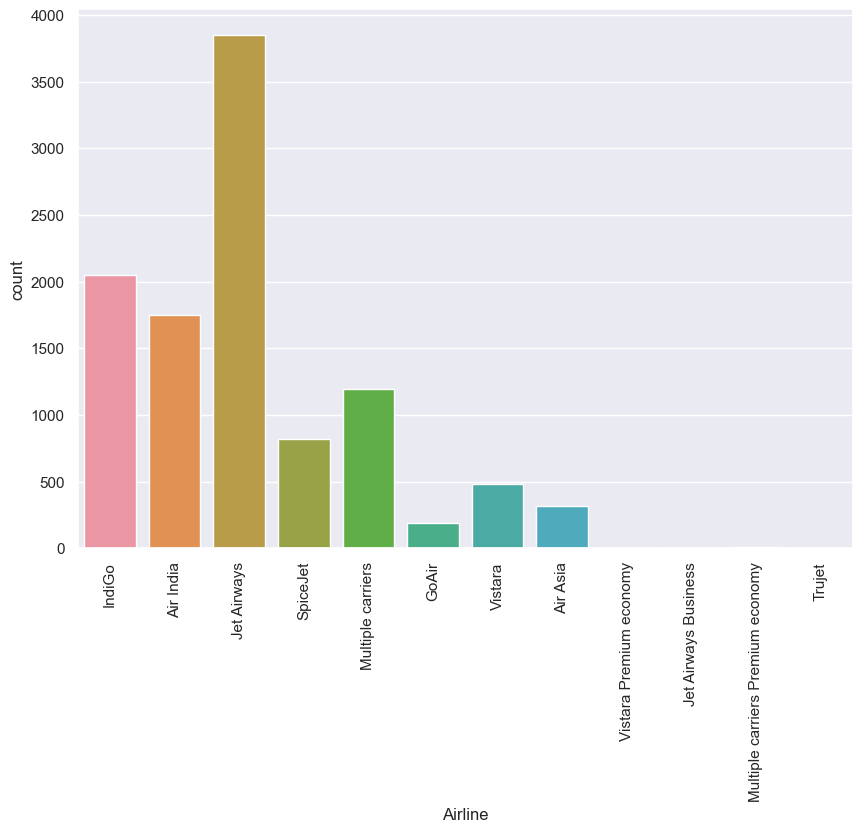

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x="Airline",data=data)
plt.xticks(rotation=90)

* Jet Airways is the costliest.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

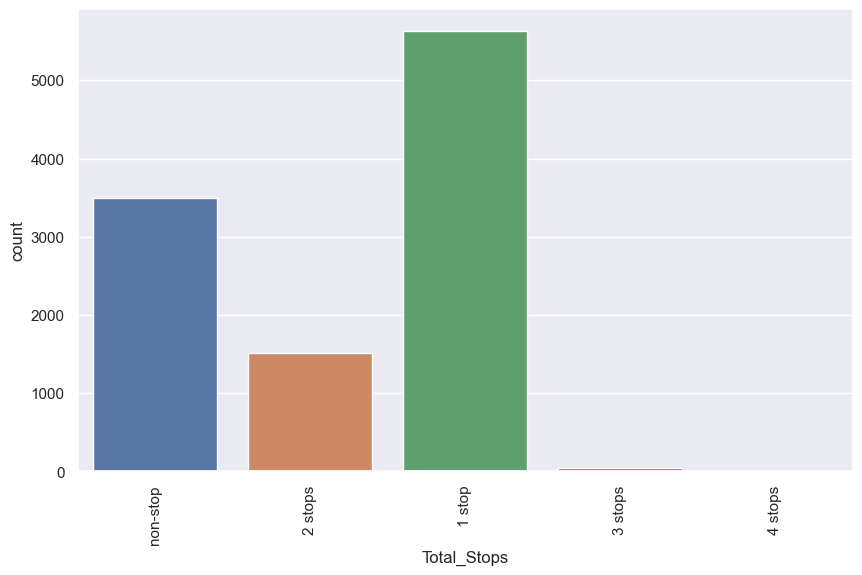

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=data)
plt.xticks(rotation=90)

* Most of the flights have 1stop(single stop in between taking off and landing).

### Bivariate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

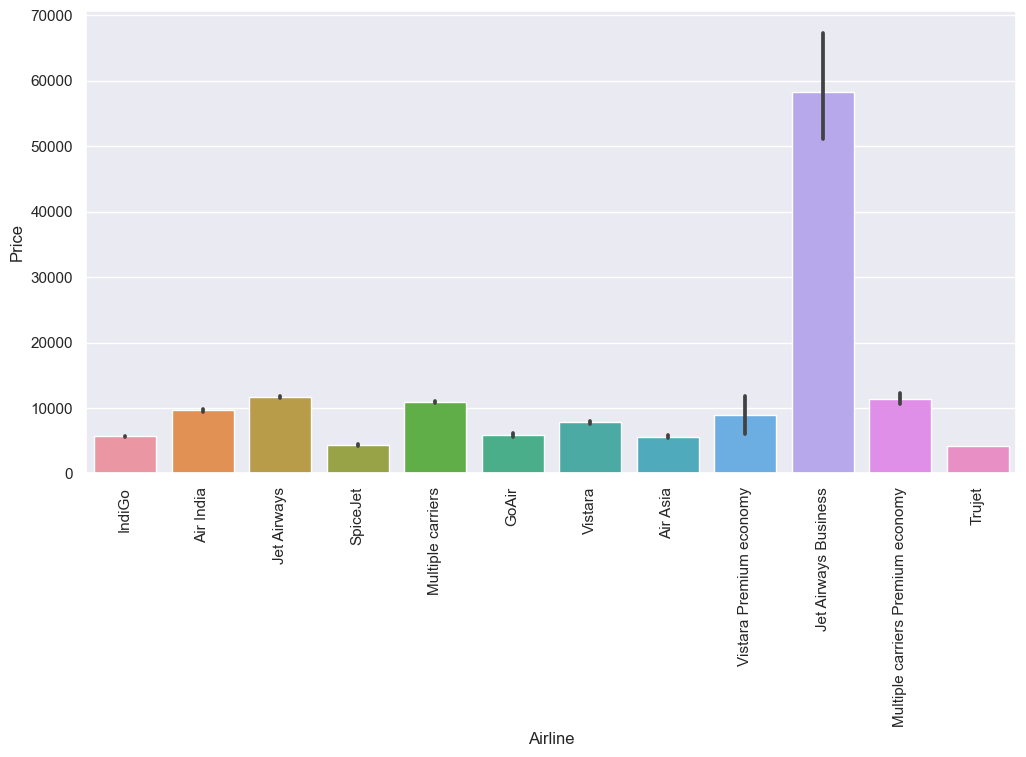

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=data)
plt.xticks(rotation=90)

* Jet Airways Business is the costliest 

## Data Preprocessing

In [21]:
#checking the null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* null values present in "Route" and"Total_Stops".

In [22]:
#dropping the null values
data.dropna(inplace=True)

In [23]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* null values has been cleared.

#### Extracting Date and Month from "Date_of_Journey" column.

In [24]:
# extracting date and month from the Date_of_journey
#date
data["journey_Date"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [25]:
#month
data["journey_Month"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [26]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


* A seperate column for date and month has been created

In [27]:
#dropping the column "Date_of_journey"
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [28]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Extracting Hour and Minutes from  "Dep_Time" column.

In [29]:
#hour
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour

In [30]:
#minutes
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [31]:
#dropping the column "Dep_Time"
data.drop(['Dep_Time'],axis=1,inplace=True)

In [32]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### Extracting Hour and Minutes from "Arrival_Time" column.

In [33]:
#hours
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour

In [34]:
#minutes
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [35]:
#dropping "Arrival_Time".
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [36]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


#### Extracting Hour and Minutes from "Duration" column.


In [37]:
#converting "duration" column into list to extract hour and minutes seperately.
duration = list(data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [38]:
#creating new column for hours and minutes.
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [39]:
#dropping "Duration" column
data.drop(['Duration'],axis=1,inplace=True)

In [40]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


###### converting categorical columns to numerical columns
* using One Hot Encoding

In [41]:
#converting
cat_col=data.select_dtypes(include=["O"])
cat_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [42]:
data2=data.copy()

In [43]:
#one hot encoding
df1=pd.get_dummies(data2["Airline"],drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(["Airline"],axis=1)

In [44]:
data2.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,...,0,1,0,0,0,0,0,0,0,0


In [45]:
#one hot encoding
df2=pd.get_dummies(data2["Source"],drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(["Source"],axis=1)

In [46]:
data2.head(3)

,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,...,0,0,0,0,0,0,0,1,0,0


In [47]:
#one hot encoding
df3=pd.get_dummies(data2["Destination"],drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(["Destination"],axis=1)

In [48]:
data2.head()

,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [49]:
#drouping "Additional_info"
data2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [50]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [51]:
data2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [52]:
#manually encoding
data2.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df=data2
df.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [53]:
x=df.drop("Price",axis=1)
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


# scaling 

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.         0.88461538 0.         ... 0.         0.         1.        ]
 [0.5        0.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.30769231 1.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.5        0.30769231 0.66666667 ... 0.         0.         0.        ]]


## Feature Engineering

In [55]:
data2=df.iloc[0:10,0:10]
data2

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,12,3,18,55,10,25,15,30
7,1,22270,1,3,8,0,5,5,21,5
8,1,11087,12,3,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


In [56]:
data2.corr()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Total_Stops,1.000000,0.415321,-0.639003,0.253185,-0.502264,0.405355,0.112469,0.088946,0.430101,-0.490055
Price,0.415321,1.000000,-0.659511,-0.366571,-0.333911,0.031325,-0.193463,-0.203835,0.703591,-0.542767
journey_Date,-0.639003,-0.659511,1.000000,0.267372,0.305646,-0.319999,-0.071263,-0.117263,-0.378853,0.487520
journey_Month,0.253185,-0.366571,0.267372,1.000000,-0.400946,-0.399323,0.166297,0.162142,-0.271248,-0.332520
Dep_hour,-0.502264,-0.333911,0.305646,-0.400946,1.000000,-0.020904,0.080281,0.201823,-0.438518,0.528181
Dep_min,0.405355,0.031325,-0.319999,-0.399323,-0.020904,1.000000,0.116379,0.322526,0.239471,0.304109
Arrival_hour,0.112469,-0.193463,-0.071263,0.166297,0.080281,0.116379,1.000000,0.573010,-0.393844,0.362001
Arrival_min,0.088946,-0.203835,-0.117263,0.162142,0.201823,0.322526,0.573010,1.000000,-0.134939,0.080203
Duration_hours,0.430101,0.703591,-0.378853,-0.271248,-0.438518,0.239471,-0.393844,-0.134939,1.000000,-0.585949
Duration_mins,-0.490055,-0.542767,0.487520,-0.332520,0.528181,0.304109,0.362001,0.080203,-0.585949,1.000000


### Heatmap to find correlation.

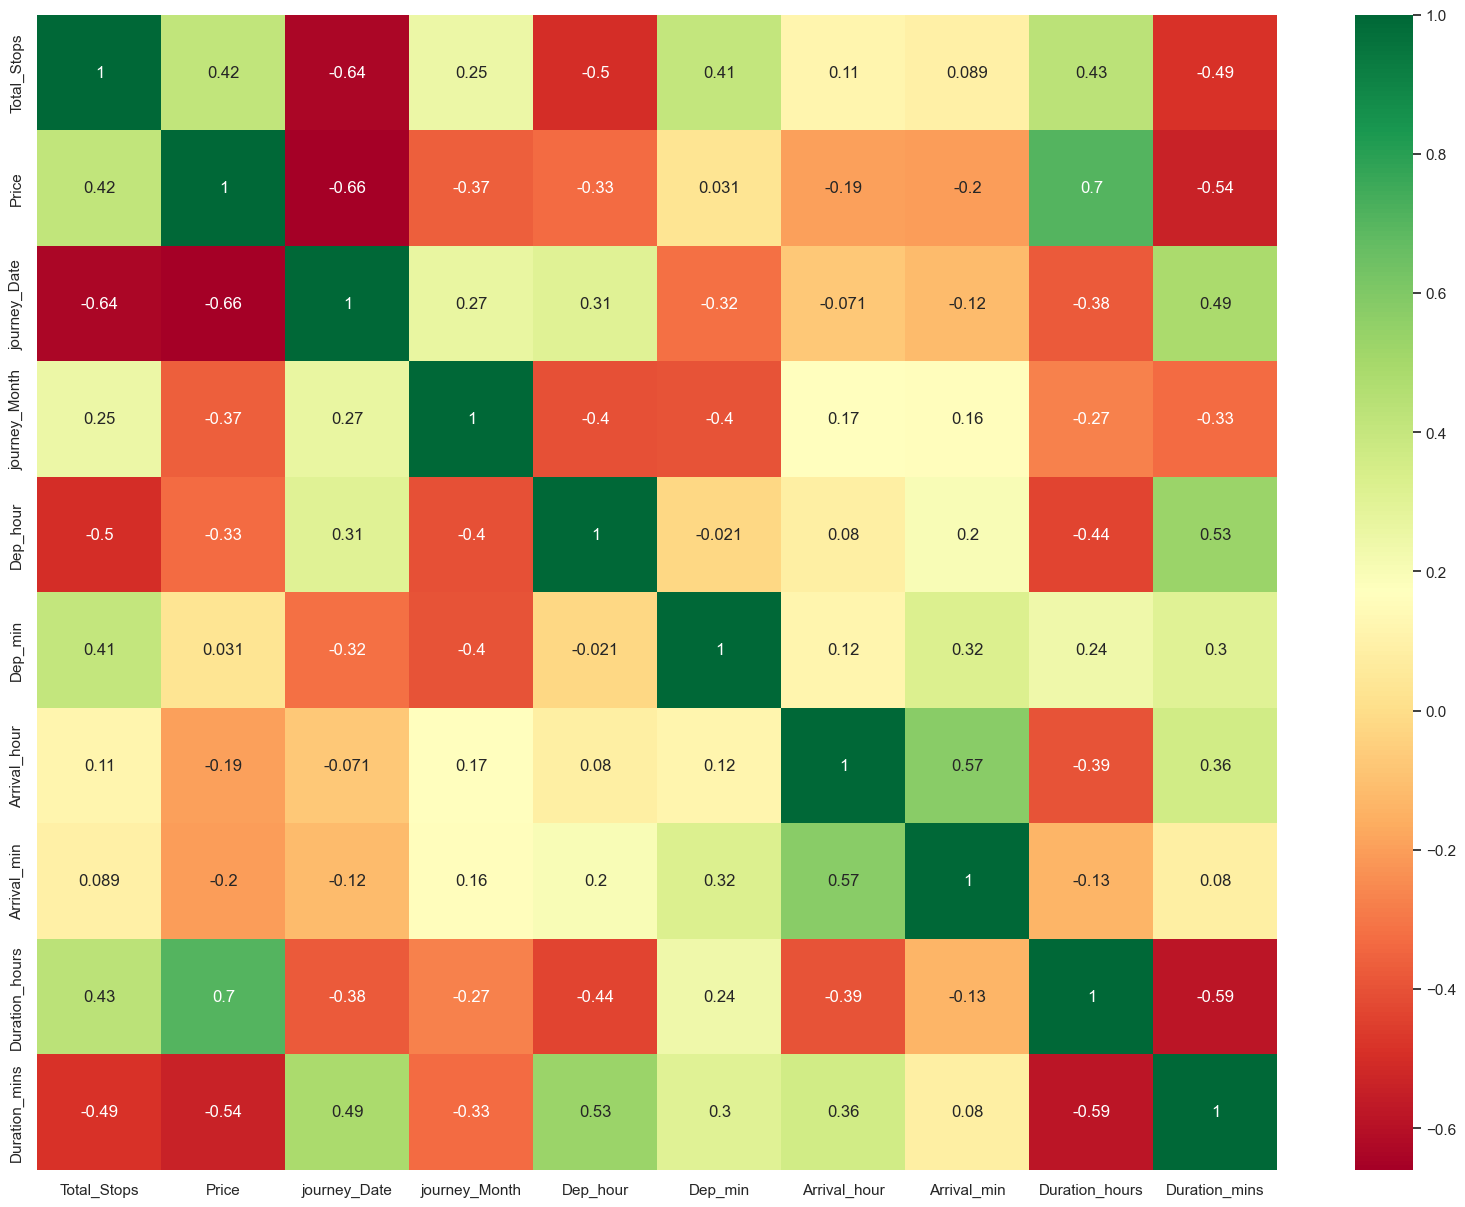

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot = True, cmap = "RdYlGn")
plt.tick_params(labelsize=11)

 * There is few cells which shows high correlation but it is between independent and dependent columns

## MODEL CREATION

In [58]:
#seperating the independent and dependent (for model creation)
x=df.drop("Price",axis=1)
y=df["Price"]

In [59]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 29)
(8011,)
(2671, 29)
(2671,)


## LINEAR REGRESSION

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

7835152.949901845
1949.458356115105


In [63]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.6198931301596471

In [64]:
import math
rmse=math.sqrt(mae)
print(rmse)

44.15267099638599


## DECISION TREE

In [65]:
#seperating dependent and independent values
x=df.drop("Price",axis=1)
y=df["Price"]

In [66]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [67]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()#object creation for decision tree
dt.fit(x_train,y_train)#training the model
y_pred=dt.predict(x_test)#prediction


In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mse

5913007.9077638425

In [69]:
mae=mean_absolute_error(y_test,y_pred)
mae

1358.592162735555

In [70]:
dt_score=r2_score(y_test,y_pred)
dt_score

0.7131421758410569

## RANDOM FOREST 

In [71]:
#seperating independent and dependent values
x=df.drop("Price",axis=1)
y=df["Price"]

In [72]:
# Splitting the Data into Train and Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [73]:
x.shape

(10682, 29)

In [74]:
y.shape

(10682,)

In [75]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MAE=mean_absolute_error(y_test,y_pred)
MAE

1164.3633408510143

In [77]:
MSE=mean_squared_error(y_test,y_pred)
MSE

4137409.0156320552

In [78]:
r2=r2_score(y_test,y_pred)
r2

0.7992818263744478

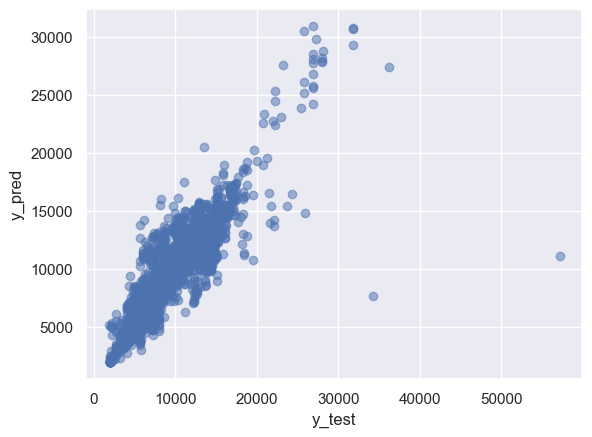

<Figure size 600x400 with 0 Axes>

In [79]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

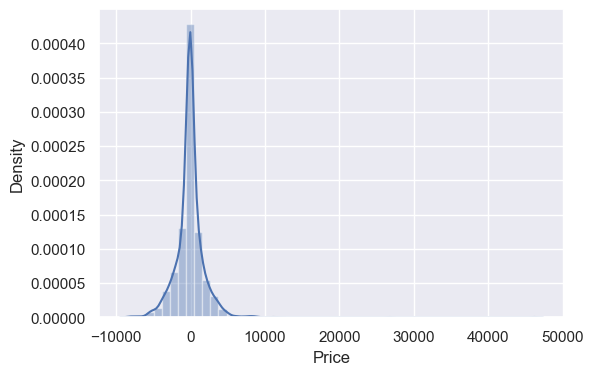

In [80]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

### Hyper Parameter Tuning  

In [81]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]

In [82]:
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}

In [83]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [84]:
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [85]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [86]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 500,
min_samples_split= 10,
min_samples_leaf= 1,
max_features= 'auto',
max_depth= 20)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [87]:
from sklearn import metrics

In [88]:
 from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [89]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1134.5516303432153

In [90]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3842717.987426747

In [91]:
RMSE=np.sqrt(MSE)
RMSE

1960.2851801273066

In [92]:
random_forest.score(x_train,y_train)

0.9107411676107126

In [93]:
random_forest.score(x_test,y_test)

0.8135781757906462

In [94]:
rf_score=metrics.r2_score(y_test,y_pred)
rf_score

0.8135781757906462

In [95]:
prediction=rf_random.predict(x_test)

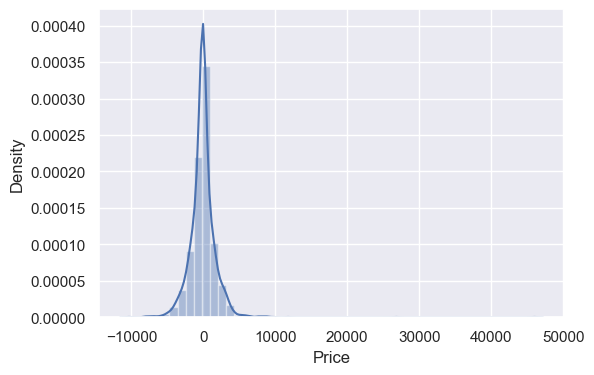

In [96]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-prediction)
plt.show()

* Normal Distrubution in the curve

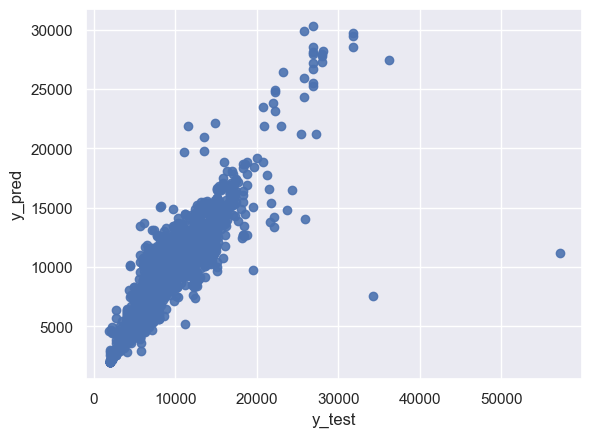

<Figure size 600x400 with 0 Axes>

In [97]:
plt.scatter(y_test, y_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

* Linearly scattered

### GRADIENT BOOSTING

In [98]:
#seperating the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [99]:
#Train & Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [100]:
## importing the library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100) 
gbm.fit(x_train,y_train) ## fitting data
y_hat=gbm.predict(x_test)#predicting price

In [101]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [102]:
mse=mean_squared_error(y_test,y_hat)
mse

4309212.220939533

In [103]:
mae=mean_absolute_error(y_test,y_hat)
mae

1488.4495799101098

In [104]:
gb_score=r2_score(y_test,y_hat)
gb_score

0.7909471353970645

### HYPER PARAMETER TUNING

In [105]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [106]:
rsc=RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,scoring='neg_mean_squared_error',n_iter=100,cv=4,verbose=2,random_state=42,n_jobs=-1)

In [107]:
rsc.fit(x_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [108]:
rsc.best_params_

{'subsample': 0.9,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 5,
 'learning_rate': 0.1}

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor(n_estimators= 300,
min_samples_split= 10,
min_samples_leaf= 2,
subsample= 0.9,
learning_rate= 0.1,
max_depth= 5)

gradient_boost.fit(x_train,y_train)
y_hat=gradient_boost.predict(x_test)

In [110]:
#evaluating
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [111]:
mse=mean_squared_error(y_test,y_hat)
mse

3133234.828356419

In [112]:
mae=mean_absolute_error(y_test,y_hat)
mae

1166.4877617112002

In [113]:
gbst_score=r2_score(y_test,y_hat)
gbst_score

0.8479973408692355

In [114]:
scores = [lr_score,dt_score,rf_score,gbst_score]
algorithms = ["Linear Regression","Decision Tree","Random␣Forest","Gradient Boosting"]
for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The R2 score achieved using Linear Regression is: 0.6198931301596471%
The R2 score achieved using Decision Tree is: 0.7131421758410569%
The R2 score achieved using Random␣Forest is: 0.8135781757906462%
The R2 score achieved using Gradient Boosting is: 0.8479973408692355%


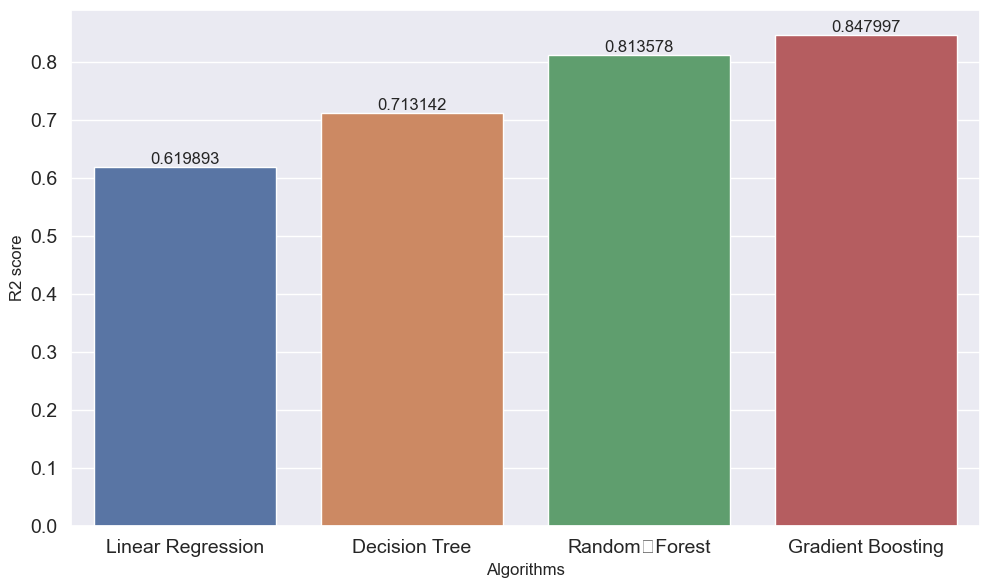

In [115]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

## conclusion

* Gradient Boosting model is the best model.
* Followed by Random Forest,Decision Tree,Linear Regression.
* Total_Stops,Duration,Airline and Route are the the features that has impact on prices. 